In [3]:
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)


<ipython-input-3-62551d05d751>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [5]:
data=pd.read_csv('boat_reviews.csv')
data.head(2)

,Unnamed: 0,reviews
0,0,\nI have purchased this boat earphone few months ago...😊Here I'm sharing our experience with this product.Build quality⏮️⏭️ Its build quality is Awesome and looks premium in hands when you hold it in your hands. Also its a light weight product.Sound quality⏮️⏭️ sound quality is good.Works well for soft and melody songs with my personal experience.Length⏮️⏭️ comes with long size cable which is a cool thing and I like it. One thing I like is that it comes with a strap to tangle the cable.Ear comfort ⏮️⏭️ get fit easily in ears.Durability ⏮️⏭️ It will depend what kind of user you are. If you're protective towards your stuff so maybe this will be a last long product.******************************************Cons⏯️⏯️Come with dedicated microphone which works ok ok. There is still noise in calling while traveling. So not satisfied with this noise cancellation Mike.I am not satisfied with the bass quality. It works average.******************************************What you will get inside?⏮️⏭️ You will get earphone with some paperwork's and it comes with one year warranty which you have to activate by calling on the given number I guess.You will also get two pairs of additional ear protector for further use.I hope this will help you to make your purchase decision.😊\n
1,1,"\nOne of the best pair of earphone for the price1} Sound quality is amazing for the price 😍2} Built quality is good but not the best but for the budget price I can say its good ⚡3} Headphone jack is not gold plated ⚠️4} I have been using this earphone from past more than a year and have replaced it once under warranty which was super easy hassel free🎶5} I have used many other brand earphones such as JBL, Sony, Sennheiser, RHA, Boultaudio and recently Infinity and I am not a professional but have experience of many earphones so I can say this is the best sounding in budget and very comfortable in shape to use for longer duration 💯💥I can definitely recommend this earphones must buy in budget segment 🔝🔝✅🔥🔥\n"


In [6]:
df=data.copy()

In [8]:
df['reviews']=df['reviews'].apply(lambda x:x.strip('\n')) # To remove '\n' from every review
df.head(2)

,Unnamed: 0,reviews
0,0,I have purchased this boat earphone few months ago...😊Here I'm sharing our experience with this product.Build quality⏮️⏭️ Its build quality is Awesome and looks premium in hands when you hold it in your hands. Also its a light weight product.Sound quality⏮️⏭️ sound quality is good.Works well for soft and melody songs with my personal experience.Length⏮️⏭️ comes with long size cable which is a cool thing and I like it. One thing I like is that it comes with a strap to tangle the cable.Ear comfort ⏮️⏭️ get fit easily in ears.Durability ⏮️⏭️ It will depend what kind of user you are. If you're protective towards your stuff so maybe this will be a last long product.******************************************Cons⏯️⏯️Come with dedicated microphone which works ok ok. There is still noise in calling while traveling. So not satisfied with this noise cancellation Mike.I am not satisfied with the bass quality. It works average.******************************************What you will get inside?⏮️⏭️ You will get earphone with some paperwork's and it comes with one year warranty which you have to activate by calling on the given number I guess.You will also get two pairs of additional ear protector for further use.I hope this will help you to make your purchase decision.😊
1,1,"One of the best pair of earphone for the price1} Sound quality is amazing for the price 😍2} Built quality is good but not the best but for the budget price I can say its good ⚡3} Headphone jack is not gold plated ⚠️4} I have been using this earphone from past more than a year and have replaced it once under warranty which was super easy hassel free🎶5} I have used many other brand earphones such as JBL, Sony, Sennheiser, RHA, Boultaudio and recently Infinity and I am not a professional but have experience of many earphones so I can say this is the best sounding in budget and very comfortable in shape to use for longer duration 💯💥I can definitely recommend this earphones must buy in budget segment 🔝🔝✅🔥🔥"


In [13]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [18]:
STOPWORDS=stopwords.words("english") #stopwords are the most common unnecessary words. eg is, he, that, etc.

In [19]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii') # A function to remove emojis from the reviews

In [20]:
import string   
import re

def clean_text(text):
    ps=PorterStemmer()
    
    text=deEmojify(text) # remove emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    text_cleaned=" ".join([ps.stem(token) for token in tokens])
    
    
    return text_cleaned

In [22]:
df['cleaned_reviews']=df['reviews'].apply(lambda x:clean_text(x))
df.sample(2)

,Unnamed: 0,reviews,cleaned_reviews
4139,4139,"The usp of these propods is it's charging, range, waterproof nature and Bluetooth connectivity which is automatic on removing from the case once Bluetooth of the mobile is switched on. Sound is good but noise cancellation not so much. The ergonomics are good but not so much for small ears. The worst is the support centre who do not repond more than once to warrranty and if u miss their call after registering they will not call back. But it is a steal for 1999.",usp propod charg rang waterproof natur bluetooth connect automat remov case bluetooth mobil switch sound good nois cancel much ergonom good much small ear worst support centr repond warrranti u miss call regist call back steal 1999
1423,1423,"Good product with excellent sound quality, very good noise cancellation and nice bass quality only issue is bit highly priced. Colour and quality is exactly as shown in pictures.",good product excel sound qualiti good nois cancel nice bass qualiti issu bit highli price colour qualiti exactli shown pictur


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

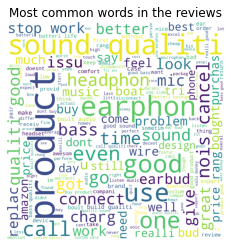

In [25]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [28]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [29]:
def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound'] # returns the compound score from the dictionary

In [30]:
df['sentiment_score']=df['reviews'].apply(lambda x:compound_score(x)) # applying on the reviews column to get the score
df.sample(5)

,Unnamed: 0,reviews,cleaned_reviews,sentiment_score
5083,5083,The product packaging was shabby and damaged...so much that dust had entered inside and the grooves of the earpieces had dust accumulated in them. The sound quality is acceptable for the price range however.....the mic is absolutely trashy!! The mic has terrible headache inducing disturbance and that's the reason I wanted to return this product right away!!! Unfortunately.....there is no refund option so I had to opt for a replacement. I don't know how the replacement product quality will be. Will update the review once the replacement is delivered.The mic of the replaced earphones is just as trashy. Absolutely of no use! Boult....stop scamming people by selling earphones with non-functioning mics as earphones with mic!Update: I got a refund as the replacement earphones' mic was defective as well! Appreciate Amazon's speedy refund process.,product packag shabbi damagedso much dust enter insid groov earpiec dust accumul sound qualiti accept price rang howeverth mic absolut trashi mic terribl headach induc disturb that reason want return product right away unfortunatelyther refund option opt replac dont know replac product qualiti updat review replac deliveredth mic replac earphon trashi absolut use boultstop scam peopl sell earphon nonfunct mic earphon micupd got refund replac earphon mic defect well appreci amazon speedi refund process,-0.8098
5175,5175,Wondering how this product for such good ratings?? Well the company calls you after you register for warranty and says that they are giving rewards for breast reviewes. They'll ask you for your reviews screenshot and will give you nothing. Beware.Although build quality is good for such price range and noise cancellation is good. One problem is that my ears hurt after using these.,wonder product good rate well compani call regist warranti say give reward breast review theyll ask review screenshot give noth bewarealthough build qualiti good price rang nois cancel good one problem ear hurt use,0.8611
1034,1034,Warranty of this product is not useful after buying this product 3-4 months later in one side and Mic not working after dead I made in warranty ticket then they picked off from my phone and deliver to the Mumbai head head office of boat service centre and then while I checking the status of my ticket then it is written that replacement product issued now it's been one month over and I didn't get my product so their service is very bad don't buy these products otherwise the product quality is very good but their service is very very poor,warranti product use buy product 34 month later one side mic work dead made warranti ticket pick phone deliv mumbai head head offic boat servic centr check statu ticket written replac product issu one month didnt get product servic bad dont buy product otherwis product qualiti good servic poor,-0.6993
3479,3479,"Buds are very comfortable, sound quality is also awesome. Once you add conferance call it creates surrounding sound effects which is not good also seems noise control freture is not upto mark. Overall good product.",bud comfort sound qualiti also awesom add confer call creat surround sound effect good also seem nois control fretur upto mark overal good product,0.8830
252,252,After using for 3 months :One side of the earphone stopped working. Had a complained filed.The product was picked up in 2 days.Now it has been 30 days and my product is nowhere to be delivered. Meanwhile I keep calling to customer care and they keep telling me that they will respond back within 24hrs to 48hrs within working days.30 days since pickup !! That's many many 24hrs. No time to call back or email ??This product is a MADE IN CHINA one. So donot buy. Rather go for JBL or Sony.I hope this review was helpful.,use 3 month one side earphon stop work complain filedth product pick 2 daysnow 30 day product nowher deliv meanwhil keep call custom care keep tell respond back within 24hr 48hr within work da

In [31]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [32]:
df['review_category']=df['sentiment_score'].apply(lambda x:sentiment_category(x))
df.sample(5)


,Unnamed: 0,reviews,cleaned_reviews,sentiment_score,review_category
2170,2170,"Its overall good package. Audio is comparatively good. Mids are bit recessed and slight echo is added for real feel. Bass is good but not punchy, it is overshadowed sometimes by mids. Coming to built quality. Its good, worthy in 999/- price tag one will not feel it cheap. But flat wires might have an added advantage. Battery backup is excellent. It can withstand 4-5 days on idle and 2-3 days on average use of 4-5 Hrs daily. If you are an audiophile and looking for budget bluetooth earphone, its not meant for you. Final Verdict: Unless you are not an audiophile and wants a good bluetooth earphone this might be best option to choose from. Its a worth buy for daily use and have superb battery backup.",overal good packag audio compar good mid bit recess slight echo ad real feel bass good punchi overshadow sometim mid come built qualiti good worthi 999 price tag one feel cheap flat wire might ad advantag batteri backup excel withstand 45 day idl 23 day averag use 45 hr daili audiophil look budget bluetooth earphon meant final verdict unless audiophil want good bluetooth earphon might best option choos worth buy daili use superb batteri backup,0.9910,positive
2826,2826,Sound is good but after one month of using it i m Facing problem of not connecting Bluetooth property even now it's useless.. it's like name bde or darshan chhote product. Even they don't let you know about warranty registration within 10 days of purchasing. I didn't aware of it. Afer one n a half month i gt to know this when i faced Bluetooth connectivity problem.. now they are not taking my complaint seriously. Buy it own your Risk. I 1299rs Wasted.,sound good one month use face problem connect bluetooth properti even useless like name bde darshan chhote product even dont let know warranti registr within 10 day purchas didnt awar afer one n half month gt know face bluetooth connect problem take complaint serious buy risk 1299r wast,-0.8914,negative
1534,1534,I loved the product in fact i ordered multiple times however every it didnt last more than two month both ordered Boat Earphone wire broke apart idk it happend to me frequently. I've no compromise with its internal quality but its wiring is disappointing 😔,love product fact order multipl time howev everi didnt last two month order boat earphon wire broke apart idk happend frequent ive compromis intern qualiti wire disappoint,-0.6249,negative
4303,4303,"This is my first tws earphones ...nd i love thm coz they fullfill all my requirements....like size,case style,battery,touch and c type charger. I was so confused while buying ....but they satisfy all my demands.The ones who want buy for calling thn u mst go for sm other option because its touch doesnot works well in calling....i dont need them much for calling so they satisfy.If u r new nd finding one obly for listening songs nd watching vedios without being bounded to the wires thn u should go for them...they r bst in this range.",first tw earphon nd love thm coz fullfil requirementslik sizecas stylebatterytouch c type charger confus buy satisfi demandsth one want buy call thn u mst go sm option touch doesnot work well callingi dont need much call satisfyif u r new nd find one obli listen song nd watch vedio without bound wire thn u go themthey r bst rang,0.8273,positive
4367,4367,"Writing after 6 months use :Average call quality, other person can't hear properly what you are saying.Sound quality is good and clear.Good battery life and Bluetooth connectivity.Bass is average.Give nice looks and feel.Overall I won't recommend if you need to make frequent calls using this. Good for working out and watching movies etc.",write 6 month use averag call qualiti person cant hear properli sayingsound qualiti good cleargood batteri life bluetooth connectivitybass averageg nice look feeloveral wont recommend need make frequent call use good work watch movi etc,0.7885,positive


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Reviews Category')

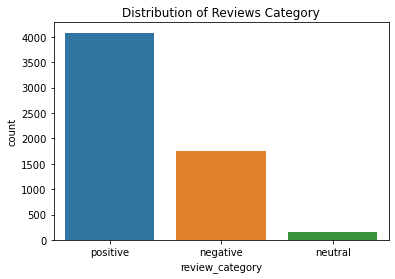

In [33]:
sns.countplot(df['review_category']).set_title("Distribution of Reviews Category")

In [34]:
positive_reviews=df.loc[df['review_category']=='positive','cleaned_reviews'].tolist() # extracting all positive reviews and converting to a list
positive_reviews[0:5]

['purchas boat earphon month agoher im share experi productbuild qualiti build qualiti awesom look premium hand hold hand also light weight productsound qualiti sound qualiti goodwork well soft melodi song person experiencelength come long size cabl cool thing like one thing like come strap tangl cableear comfort get fit easili earsdur depend kind user your protect toward stuff mayb last long productconscom dedic microphon work ok ok still nois call travel satisfi nois cancel mikei satisfi bass qualiti work averagewhat get insid get earphon paperwork come one year warranti activ call given number guessyou also get two pair addit ear protector usei hope help make purchas decis',
 'one best pair earphon price1 sound qualiti amaz price 2 built qualiti good best budget price say good 3 headphon jack gold plate 4 use earphon past year replac warranti super easi hassel free5 use mani brand earphon jbl soni sennheis rha boultaudio recent infin profession experi mani earphon say best sound bud

In [ ]:
negative_reviews=df.loc[df['review_category']=='negative','cleaned_reviews'].tolist() # extracting all negative reviews and converting to a list
negative_reviews[0:5]